In [1]:
IMG_HELP_PATH = '/Users/shankar/dev/code/ds/studies/data_science/trading/honchar'
import os
import sys
sys.path.append(os.path.abspath(IMG_HELP_PATH))
from common.preprocessing import split_train_test_in_unison

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

In [3]:
data = pd.read_csv("../datasets/apple/AAPL.csv")[::-1]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3088,2017-04-07,143.729996,144.179993,143.270004,143.339996,140.565704,16672200
3087,2017-04-06,144.289993,144.520004,143.449997,143.660004,140.879517,21149000
3086,2017-04-05,144.220001,145.460007,143.809998,144.020004,141.232559,27717900
3085,2017-04-04,143.250000,144.889999,143.169998,144.770004,141.968033,19891400
3084,2017-04-03,143.710007,144.119995,143.050003,143.699997,140.918762,19985700


In [4]:
from common.preprocessing import Classification, Regression
from common.nn.conv import HNetClassification, HNetRegression
WINDOW = 30
EMB_SIZE = 5
STEP = 1
FORECAST = 1

/anaconda3/envs/dlcv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
classifier = Classification(multivariate=True)
X, Y = classifier.preprocess(data, WINDOW, STEP, FORECAST)

list index out of range


In [6]:
X_train, X_test, Y_train, Y_test = split_train_test_in_unison(X, Y)

In [7]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3058, 30, 5)
(3058, 2)
(2446, 30, 5)
(2446, 2)
(612, 30, 5)
(612, 2)


In [8]:
inputShape = (WINDOW, EMB_SIZE)
model = HNetClassification.build(inputShape)

/Users/shankar/dev/code/ds/studies/data_science/trading/honchar/common/nn/conv/hnetclassification.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(30, 5), filters=16, kernel_size=4, padding="same")`
  border_mode='same'


In [9]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=30, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint('output/lolkek.hdf5', verbose=1, save_best_only=True)

H = model.fit(X_train, Y_train, epochs=100, batch_size=128, verbose=0, validation_data=(X_test, Y_test),
    callbacks=[reduce_lr, checkpointer], shuffle=True)


Epoch 00001: val_loss improved from inf to 0.70619, saving model to output/lolkek.hdf5

Epoch 00002: val_loss improved from 0.70619 to 0.70096, saving model to output/lolkek.hdf5

Epoch 00003: val_loss improved from 0.70096 to 0.68048, saving model to output/lolkek.hdf5

Epoch 00004: val_loss improved from 0.68048 to 0.67188, saving model to output/lolkek.hdf5

Epoch 00005: val_loss did not improve

Epoch 00006: val_loss improved from 0.67188 to 0.66336, saving model to output/lolkek.hdf5

Epoch 00007: val_loss did not improve

Epoch 00008: val_loss improved from 0.66336 to 0.65597, saving model to output/lolkek.hdf5

Epoch 00009: val_loss did not improve

Epoch 00010: val_loss improved from 0.65597 to 0.65119, saving model to output/lolkek.hdf5

Epoch 00011: val_loss did not improve

Epoch 00012: val_loss improved from 0.65119 to 0.64175, saving model to output/lolkek.hdf5

Epoch 00013: val_loss improved from 0.64175 to 0.64119, saving model to output/lolkek.hdf5

Epoch 00014: val_lo

In [10]:
#model.load_weights("output/lolkek.hdf5")
pred = model.predict(np.array(X_test))

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C = confusion_matrix([np.argmax(y) for y in Y_test], [np.argmax(y) for y in pred])
print(C/C.astype(np.float).sum(axis=1))

[[0.57407407 0.33625731]
 [0.48518519 0.61695906]]


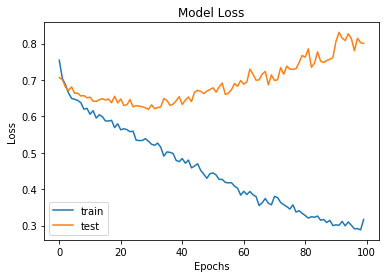

In [12]:
plt.figure()
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='best')
plt.show()

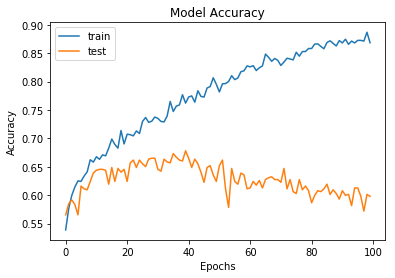

In [13]:
plt.figure()
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='best')
plt.show()